Image loaded. Shape: (117, 431)

Computing SIFT...
SIFT → 398 keypoints


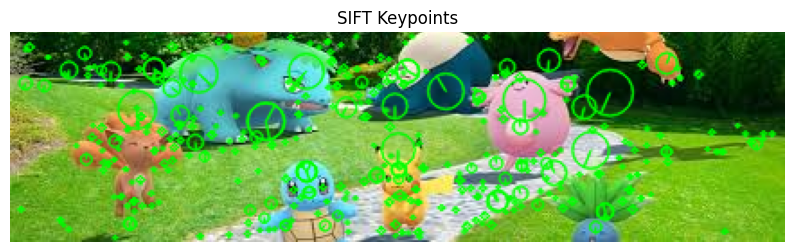


Computing ORB...
ORB → 609 keypoints


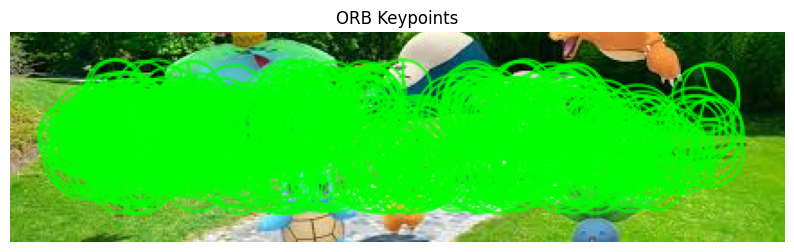


Trying SURF...
SURF not available (non-free module).
Skipping SURF visualization.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# =============================================================================
# Load Image
# =============================================================================

def load_and_prepare_image(image_path):
    """
    Load a color image and convert it to grayscale.
    """
    img_color = cv2.imread(image_path)

    if img_color is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")

    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    return img_color, img_gray


# =============================================================================
# SIFT
# =============================================================================

def detect_and_compute_sift(gray_img):
    """
    SIFT → float descriptors (128-dim)
    """

    if not hasattr(cv2, "SIFT_create"):
        print("SIFT not available in this OpenCV version.")
        return [], None

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)

    return keypoints, descriptors


# =============================================================================
# ORB
# =============================================================================

def detect_and_compute_orb(gray_img, nfeatures=1500):
    """
    ORB → binary descriptors (fast).
    """
    orb = cv2.ORB_create(nfeatures=nfeatures)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)

    return keypoints, descriptors


# =============================================================================
# SURF (often unavailable)
# =============================================================================

def detect_and_compute_surf(gray_img):
    """
    SURF → usually not available in pip install.
    """
    try:
        surf = cv2.xfeatures2d.SURF_create()
        keypoints, descriptors = surf.detectAndCompute(gray_img, None)
        return keypoints, descriptors

    except AttributeError:
        print("SURF not available (non-free module).")
        return [], None

    except cv2.error as e:
        print("SURF error:", e)
        return [], None


# =============================================================================
# Visualization
# =============================================================================

def draw_keypoints(img_color, keypoints, title="Keypoints"):
    """
    Draw keypoints safely.
    """

    if keypoints is None or len(keypoints) == 0:
        print(f"No keypoints to draw for {title}")
        return

    img_with_kp = cv2.drawKeypoints(
        img_color,
        keypoints,
        None,
        color=(0, 255, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()


# =============================================================================
# MAIN
# =============================================================================

def main(image_path):

    # --------------------------------------------------
    # Change this to your image
    # --------------------------------------------------
    #image_path = r"C:\Desktop\Trim-III\CV\Lab\Pokemon Go.jpg"
        # image_path = "chessboard.jpg"
    # image_path = "building facade.jpg"


    try:
        color_img, gray_img = load_and_prepare_image(image_path)
    except FileNotFoundError as e:
        print(e)
        print("Update 'image_path' with a valid file.")
        return

    print(f"Image loaded. Shape: {gray_img.shape}")

    # ==================================================
    # SIFT
    # ==================================================
    print("\nComputing SIFT...")
    kp_sift, des_sift = detect_and_compute_sift(gray_img)

    print(f"SIFT → {len(kp_sift)} keypoints")
    if kp_sift:
        draw_keypoints(color_img, kp_sift, "SIFT Keypoints")

    # ==================================================
    # ORB
    # ==================================================
    print("\nComputing ORB...")
    kp_orb, des_orb = detect_and_compute_orb(gray_img, nfeatures=2000)

    print(f"ORB → {len(kp_orb)} keypoints")
    if kp_orb:
        draw_keypoints(color_img, kp_orb, "ORB Keypoints")

    # ==================================================
    # SURF
    # ==================================================
    print("\nTrying SURF...")
    kp_surf, des_surf = detect_and_compute_surf(gray_img)

    if kp_surf:
        print(f"SURF → {len(kp_surf)} keypoints")
        draw_keypoints(color_img, kp_surf, "SURF Keypoints")
    else:
        print("Skipping SURF visualization.")


# Run
if __name__ == "__main__":
    main("Pokemon Go.jpg")

Image loaded. Shape: (800, 800)

Computing SIFT...
SIFT → 646 keypoints


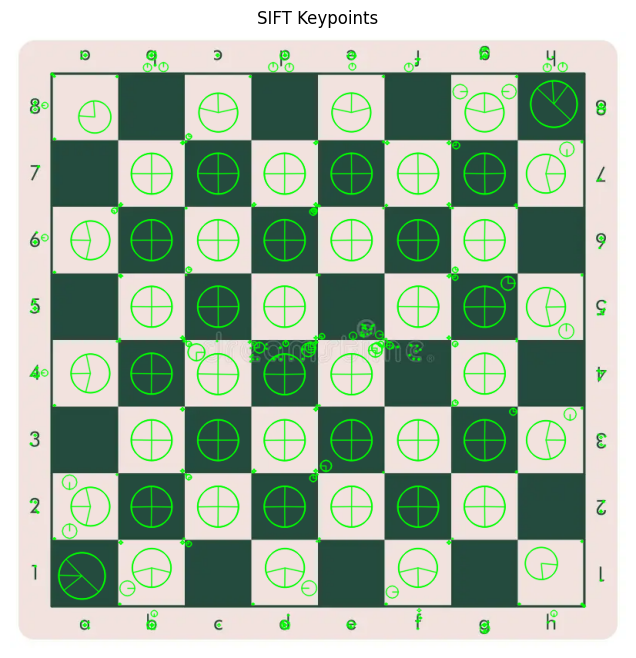


Computing ORB...
ORB → 1898 keypoints


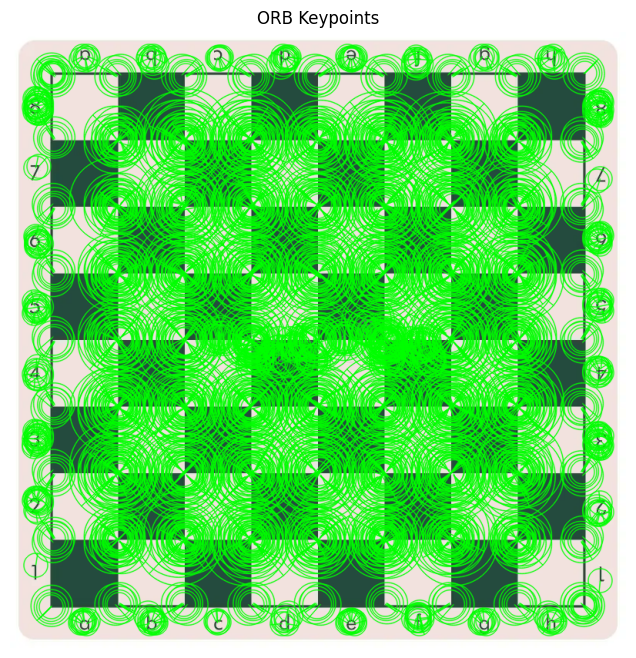


Trying SURF...
SURF not available (non-free module).
Skipping SURF visualization.


In [4]:
main("chessboard.jpg")